<a href="https://colab.research.google.com/github/seungyoonnam/machine-learning/blob/main/wine_LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

http://bit.ly/wine_csv_data

In [8]:
import numpy as np
import pandas as pd

# 데이터 파일 불러오기 (column 이름 없음)
# header=None 매개변수를 사용하여 헤더 정보를 무시하고 데이터를 불러옵니다.
df = pd.read_csv('http://bit.ly/wine_csv_data')  # 데이터 구분자에 따라 수정하세요.


df

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0
...,...,...,...,...
6492,11.2,1.6,3.27,1.0
6493,9.6,8.0,3.15,1.0
6494,9.4,1.2,2.99,1.0
6495,12.8,1.1,3.34,1.0


In [16]:
#결측치 확인
df.isna().sum()

alcohol    0
sugar      0
pH         0
class      0
dtype: int64

In [9]:
np.unique(df['class'])

array([0., 1.])

In [13]:
wine_input=df.drop(columns='class').to_numpy()
wine_target=df['class'].to_numpy()


#훈련세트 테스트세트 분리
from sklearn.model_selection import train_test_split

#stratify: 샘플링편향 방지
train_input, test_input, train_target, test_target = train_test_split(wine_input, wine_target, random_state=42, stratify=wine_target)

<Axes: >

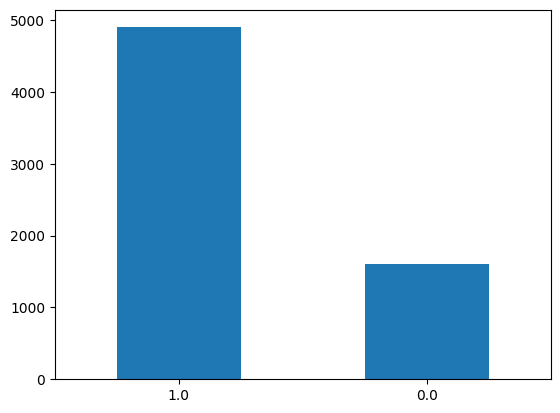

In [14]:
#1: red, 0:white

import matplotlib.pyplot as plt

count_classes=pd.value_counts(df['class'], sort=True)
count_classes.plot(kind='bar', rot=0)

In [15]:
#데이터 정규화

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_input = ss.transform(train_input)
test_input = ss.transform(test_input)

#Logistic Regression

In [17]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_input, train_target)

print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

0.784072249589491
0.7735384615384615


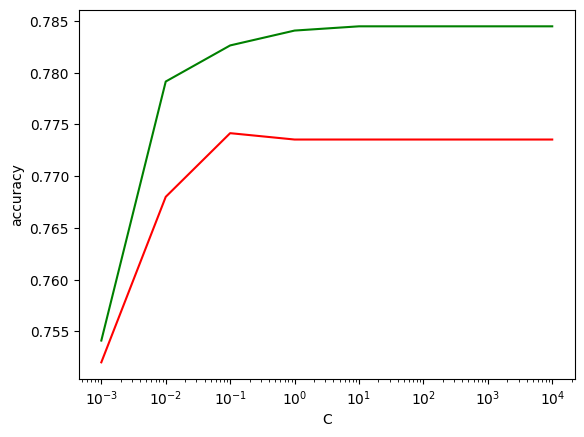

In [18]:
#최적화
C_values = [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
lr_train_score=[]
lr_test_score=[]

for C in C_values:
  lr = LogisticRegression(C=C)
  lr.fit(train_input, train_target)
  lr_train_score.append(lr.score(train_input, train_target))
  lr_test_score.append(lr.score(test_input, test_target))

plt.plot(C_values, lr_train_score, color='green')
plt.plot(C_values, lr_test_score, color='red')
plt.xscale('log')
plt.xlabel('C')
plt.ylabel('accuracy')
plt.show()

In [21]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=0.1)
lr.fit(train_input, train_target)

print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

0.7826354679802956
0.7741538461538462
